# Assignment 5 Trevor Durning

In [ ]:
### 1. Load the file /data9/UN3400/data/brf_temp.txt .


In [4]:
import numpy as np
from matplotlib import pyplot as plt


In [5]:
test_data = np.genfromtxt('/home/danielmw/data9/UN3400/data/brf_temp.txt', 
                          delimiter='\t')
test_data


array([[ 0.0000000e+00, -1.7270000e+01],
       [ 4.1670000e-02, -1.7850000e+01],
       [ 8.3330000e-02, -1.8420000e+01],
       ...,
       [ 3.6516597e+02, -1.4530000e+01],
       [ 3.6520764e+02, -1.4680000e+01],
       [ 3.6525000e+02, -1.4760000e+01]])

In [6]:
print(test_data.shape)


time = test_data[:, 0]  
temperature = test_data[:, 1] 

print(time[:5])
print(temperature[:5])

(8585, 2)
[0.      0.04167 0.08333 0.125   0.16667]
[-17.27 -17.85 -18.42 -18.94 -19.29]


In [7]:
t = test_data[:,0:1] # grabs all instances in the first column and make it into a column vector
t


array([[0.0000000e+00],
       [4.1670000e-02],
       [8.3330000e-02],
       ...,
       [3.6516597e+02],
       [3.6520764e+02],
       [3.6525000e+02]])

Model parameters: A = -11.583299586428742, B = -4.270839428763974, C = 9.041469811928382


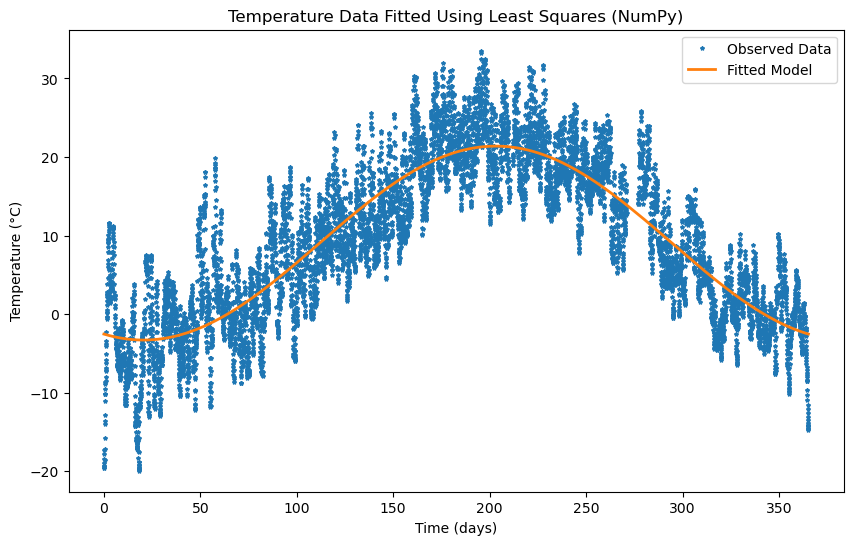

In [13]:
# 2. Use the least squares method to fit a model to this data. 
time = test_data[:, 0]
temperature = test_data[:, 1]

P = 365.25

X = np.column_stack((np.cos(2 * np.pi * time / P), np.sin(2 * np.pi * time / P), np.ones_like(time)))

beta, residuals, rank, s = np.linalg.lstsq(X, temperature, rcond=None)
A, B, C = beta

print(f"Model parameters: A = {A}, B = {B}, C = {C}")


temperature_pred = A * np.cos(2 * np.pi * time / P) + B * np.sin(2 * np.pi * time / P) + C

plt.figure(figsize=(10, 6))
plt.plot(time, temperature, '*', markersize=3, label='Observed Data')
plt.plot(time, temperature_pred, label='Fitted Model', linewidth=2)
plt.xlabel('Time (days)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.title('Temperature Data Fitted Using Least Squares (NumPy)')
plt.show()

SciPy model parameters: A = -11.583299586823854, B = -4.270839425694185, C = 9.041469810935801


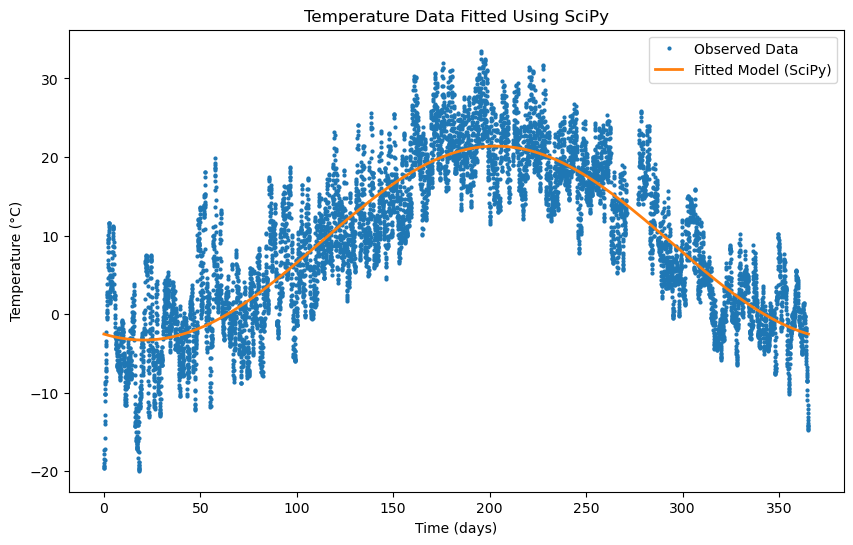

In [14]:
# Do this first with numpy only (as in class) and then verify your answer with either SciPy or statsmodels. 
from scipy import optimize

def temp_model(t, A, B, C):
    P = 365.25
    return A * np.cos(2 * np.pi * t / P) + B * np.sin(2 * np.pi * t / P) + C
    
mest_ez = optimize.curve_fit(temp_model, xdata=test_data[:,0], ydata=test_data[:,1])[0]

print(f"SciPy model parameters: A = {mest_ez[0]}, B = {mest_ez[1]}, C = {mest_ez[2]}")

temperature_pred_scipy = temp_model(test_data[:,0], *mest_ez)

plt.figure(figsize=(10, 6))
plt.plot(test_data[:,0], test_data[:,1], 'o', markersize=2, label='Observed Data')
plt.plot(test_data[:,0], temperature_pred_scipy, label='Fitted Model (SciPy)', linewidth=2)
plt.xlabel('Time (days)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.title('Temperature Data Fitted Using SciPy')
plt.show()

In [15]:
# 3. Calculate the model parameters and the standard error of the model parameters assuming the given functional form:
from scipy import optimize
import numpy as np

def temp_model(t, A, B, C):
    P = 365.25  # Period (days)
    return A * np.cos(2 * np.pi * t / P) + B * np.sin(2 * np.pi * t / P) + C

params, covariance = optimize.curve_fit(temp_model, test_data[:,0], test_data[:,1])

A, B, C = params
print(f"Fitted parameters: A = {A}, B = {B}, C = {C}")

param_errors = np.sqrt(np.diag(covariance))

A_error, B_error, C_error = param_errors
print(f"Standard errors: A_error = {A_error}, B_error = {B_error}, C_error = {C_error}")


Fitted parameters: A = -11.583299586823854, B = -4.270839425694185, C = 9.041469810935801
Standard errors: A_error = 0.07569392440890499, B_error = 0.07681814606836017, C_error = 0.0539266906588465


In [16]:
# 4
D = np.sqrt(A**2 + B**2)
print(f"Amplitude (D) of the seasonal cycle: {D}")

Amplitude (D) of the seasonal cycle: 12.345561903703594


In [17]:
# 5. When is the peak t_max of the seasonal cycle? 
P = 365.25 

t_max = (P / (2 * np.pi)) * np.arctan2(B, A)

if t_max < 0:
    t_max += P

print(f"Time of the peak (t_max): {t_max} days")

Time of the peak (t_max): 203.15942123067146 days


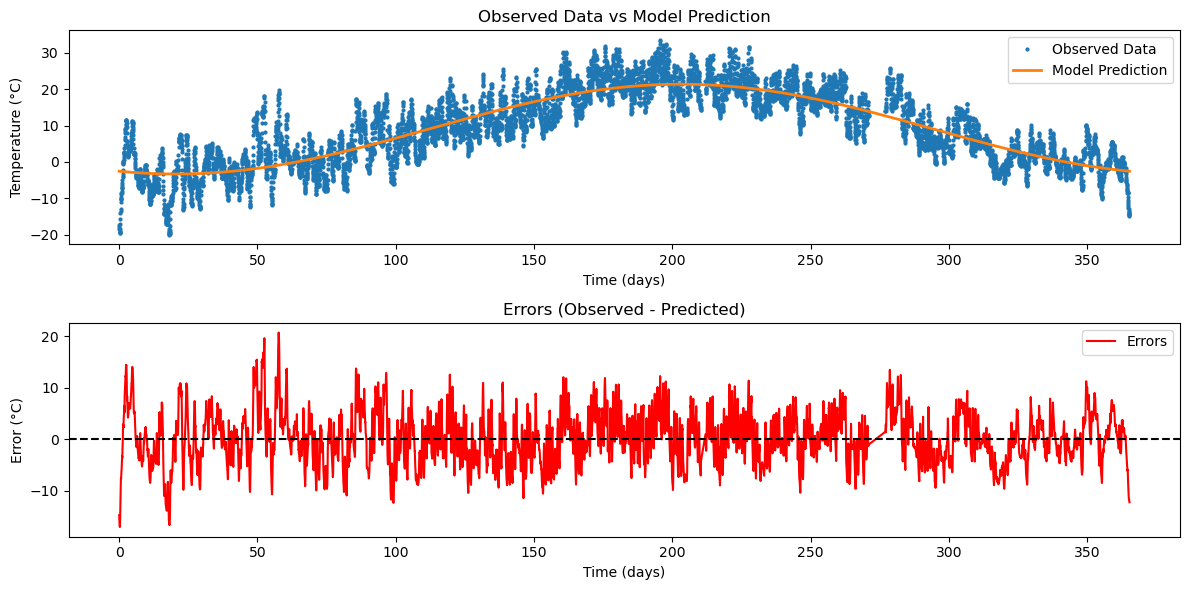

In [12]:
#6. Plot the model prediction and the observed data versus time on the same plot. Also plot the errors versus time. 
import matplotlib.pyplot as plt

temperature_pred = A * np.cos(2 * np.pi * test_data[:,0] / P) + B * np.sin(2 * np.pi * test_data[:,0] / P) + C

errors = test_data[:,1] - temperature_pred

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(test_data[:,0], test_data[:,1], 'o', markersize=2, label='Observed Data')
plt.plot(test_data[:,0], temperature_pred, label='Model Prediction', linewidth=2)
plt.xlabel('Time (days)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.title('Observed Data vs Model Prediction')

plt.subplot(2, 1, 2)
plt.plot(test_data[:,0], errors, label='Errors', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Time (days)')
plt.ylabel('Error (°C)')
plt.title('Errors (Observed - Predicted)')
plt.legend()

plt.tight_layout()
plt.show()